In [ ]:
dari  google.colab  impor  drive
drive.mount( '/content/drive' )

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
dts = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Data/DataPBL/PBL1/test_data_cl_v2.csv')
dtr = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Data/DataPBL/PBL1/train_data_cl_v2.csv')
label = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Data/DataPBL/PBL1/test_data_GroundTruth_cl.csv')

In [ ]:
dtr.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          529
Embarked         0
dtype: int64

In [ ]:
dtr.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [ ]:
dts.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          244
Embarked         0
dtype: int64

In [ ]:
dts.dtypes

PassengerId      int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

**Membuat bar chart perbandingan antara data training dan data testing**

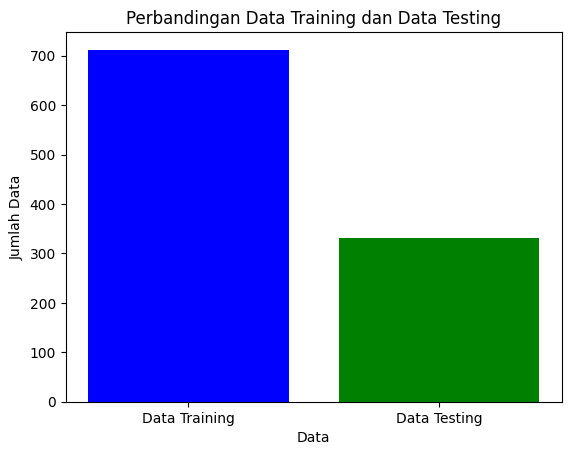

Jumlah data Training : 712
Jumlah Data Testing : 331


In [ ]:
import matplotlib.pyplot as plt


jml_dtr = len(dtr.index)
jml_dts = len(dts.index)
def buat_chart_perbandingan(data1, data2, label1, label2, judul):
    # Data preparation
    labels = [label1, label2]

    # Plotting the bar chart
    plt.bar(labels, [data1, data2], color=['blue', 'green'])

    # Adding title and labels
    plt.title(judul)
    plt.xlabel('Data')
    plt.ylabel('Jumlah Data')

    # Showing the chart
    plt.show()

# Contoh penggunaan
data1 = jml_dtr
data2 = jml_dts
label1 = 'Data Training'
label2 = 'Data Testing'
judul = 'Perbandingan Data Training dan Data Testing'

buat_chart_perbandingan(data1, data2, label1, label2, judul)
print('Jumlah data Training :', data1)
print('Jumlah Data Testing :', data2)

**Melakukan Selection Feature**

In [ ]:
#melakukan dropping atribut kolom yang tidak dipakai
dtr = dtr.drop(columns = ['PassengerId','Name','Cabin', 'Fare', 'Ticket'], axis =1)
dts = dts.drop(columns = ['PassengerId','Name','Cabin', 'Fare', 'Ticket'], axis =1)

In [ ]:
# Dividing d_train into data and labels/targets
dtr_label=dtr['Survived']
dtr_x = dtr.drop(['Survived'],axis=1)

dts_label = label.drop(['PassengerId'],axis=1)

**Label Encoding Type object**

In [ ]:
from sklearn.preprocessing import LabelEncoder

object_columns = dtr_x.select_dtypes(include='object').columns.tolist()
le = LabelEncoder()
for kolom in object_columns:
  dtr_x[kolom] = le.fit_transform(dtr_x[kolom])

In [ ]:
object_columns_test = dts.select_dtypes(include='object').columns.tolist()
le = LabelEncoder()
for kolom in object_columns:
  dts[kolom] = le.fit_transform(dts[kolom])

**Scalling Data**

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
dtr_x = scaler.fit_transform(dtr_x)
dts = scaler.transform(dts)

**Perceptron**

In [ ]:
class Perceptron:

  def __init__(self, learning_rate= 0.01 ,n_iters=1000):
    self.lr = learning_rate
    self.n_iters = n_iters
    self.activation_func = self.unit_step_function
    self.weights = None
    self.bias = None

  def fit(self,x,y):
    n_sample, n_feature = x.shape

    # menginisiasi weights & bias
    self.weights = np.random.random(x.shape[1])
    self.bias = 1

    y_ = np.array([1 if i > 0 else 0 for i in y])

    #Melakukan loop
    for _ in range(self.n_iters):
      for idx, x_i in enumerate(x):
        linear_output = np.dot(x_i, self.weights) + self.bias
        y_predict = self.activation_func(linear_output)

        update = self.lr * (y_[idx] - y_predict)
        self.weights= update * x_i
        self.bias = update

  def predict(self,x):
    linear_output = np.dot(x,self.weights) + self.bias
    y_predict = self.activation_func(linear_output)
    return y_predict

  def sigmoid_function(self, x, dvalues):
    if forward :
       self.output = 1/(1+np.exp(-x))
    else :
       self.dinput = dvalues * (1-self.output)*self.output


  def unit_step_function(self,x):
    return np.where(x >= 0, 1, 0)

In [ ]:
def accuracy(y_true, y_pred):
  y_true = y_true.values.flatten()
  return np.sum(y_true == y_pred) /len(y_true)

In [ ]:
p = Perceptron(learning_rate=0.01, n_iters=1000)
p.fit(dtr_x ,dtr_label)
prediction_test = p.predict(dts)
prediction_train= p.predict(dtr_x)
print('Perceptron test result :', accuracy(dts_label, prediction_test))
print('Perceptron train result :', accuracy(dtr_label, prediction_train))

#fig = plt.figure()
#ax = fig.add_subplot(1, 1, 1)
#plt.scatter(dtr_x[:, 0], dtr_x[:, 1], marker="o", c=dtr_label)

x0_1 = np.amin(dtr_x[:, 0])
x0_2 = np.amax(dtr_x[:, 0])

x1_1 = (-p.weights[0] * x0_1 - p.bias) / p.weights[1]
x1_2 = (-p.weights[0] * x0_2 - p.bias) / p.weights[1]

#ax.plot([x0_1, x0_2], [x1_1, x1_2], "k")

ymin = np.amin(dtr_x[:, 1])
ymax = np.amax(dtr_x[:, 1])
#ax.set_ylim([ymin - 3, ymax + 3])

Perceptron test result : 0.7673716012084593
Perceptron train result : 0.6924157303370787


In [ ]:
# def activation_func(value):    #Tangent Hypotenuse
#     #return (1/(1+np.exp(-value)))
#     return ((np.exp(value)-np.exp(-value))/(np.exp(value)+np.exp(-value)))

In [ ]:
# def perceptron_train(in_data,labels,alpha):
#     X=np.array(in_data)
#     y=np.array(labels)
#     weights=np.random.random(X.shape[1])
#     original=weights
#     bias=np.random.random_sample()
#     for key in range(X.shape[0]):
#         a=activation_func(np.matmul(np.transpose(weights),X[key]))
#         yn=0
#         if a>=0.7:
#             yn=1
#         elif a<=(-0.7):
#             yn=-1
#         weights=weights+alpha*(yn-y[key])*X[key]
#         print('Iteration '+str(key)+': '+str(weights))
#     print('Difference: '+str(weights-original))
#     return weights

In [ ]:
# def perceptron_test(in_data,label_shape,weights):
#     X=np.array(in_data)
#     y=np.zeros(label_shape)
#     for key in range(X.shape[1]):
#         a=activation_func((weights*X[key]).sum())
#         y[key]=0
#         if a>=0.7:
#             y[key]=1
#         elif a<=(-0.7):
#             y[key]=-1
#     return y
# def score(result,labels):
#     difference=result-np.array(labels)
#     correct_ctr=0
#     for elem in range(difference.shape[0]):
#         if difference[elem]==0:
#             correct_ctr+=1
#     score=correct_ctr*100/difference.size
#     print('Score='+str(score))

In [ ]:
# # Dividing d_train into data and labels/targets
# dtr_label=dtr['Survived']
# dtr_x=dtr.drop(['Survived'],axis=1)

# dts_label = label.drop(['PassengerId'],axis=1)

In [ ]:
# # Learning rate
# alpha = 0.01

# # Train
# weights = perceptron_train(dtr_x, dtr_label, alpha)

Iteration 0: [0.74337824 0.17126955 0.86952939 0.79685764 0.65756707 0.82086191]
Iteration 1: [0.74337824 0.17126955 0.86952939 0.79685764 0.65756707 0.82086191]
Iteration 2: [0.74337824 0.17126955 0.86952939 0.79685764 0.65756707 0.82086191]
Iteration 3: [0.74337824 0.17126955 0.86952939 0.79685764 0.65756707 0.82086191]
Iteration 4: [0.77337824 0.18126955 1.21952939 0.79685764 0.65756707 0.84086191]
Iteration 5: [0.78337824 0.19126955 1.75952939 0.79685764 0.65756707 0.86086191]
Iteration 6: [0.81337824 0.20126955 1.77952939 0.82685764 0.66756707 0.88086191]
Iteration 7: [0.81337824 0.20126955 1.77952939 0.82685764 0.66756707 0.88086191]
Iteration 8: [0.81337824 0.20126955 1.77952939 0.82685764 0.66756707 0.88086191]
Iteration 9: [0.81337824 0.20126955 1.77952939 0.82685764 0.66756707 0.88086191]
Iteration 10: [0.81337824 0.20126955 1.77952939 0.82685764 0.66756707 0.88086191]
Iteration 11: [0.84337824 0.21126955 1.97952939 0.82685764 0.66756707 0.90086191]
Iteration 12: [0.87337824 

<ipython-input-40-22fcf04698ab>:3: RuntimeWarning: overflow encountered in exp
  return ((np.exp(value)-np.exp(-value))/(np.exp(value)+np.exp(-value)))
<ipython-input-40-22fcf04698ab>:3: RuntimeWarning: invalid value encountered in double_scalars
  return ((np.exp(value)-np.exp(-value))/(np.exp(value)+np.exp(-value)))


Iteration 375: [ 4.17337824  1.35126955 21.08452939  1.78685764  1.06756707  2.88086191]
Iteration 376: [ 4.17337824  1.35126955 21.08452939  1.78685764  1.06756707  2.88086191]
Iteration 377: [ 4.20337824  1.35126955 21.30452939  1.78685764  1.06756707  2.90086191]
Iteration 378: [ 4.20337824  1.35126955 21.30452939  1.78685764  1.06756707  2.90086191]
Iteration 379: [ 4.23337824  1.36126955 21.59452939  1.79685764  1.06756707  2.92086191]
Iteration 380: [ 4.26337824  1.37126955 21.81452939  1.79685764  1.06756707  2.94086191]
Iteration 381: [ 4.26337824  1.37126955 21.81452939  1.79685764  1.06756707  2.94086191]
Iteration 382: [ 4.29337824  1.38126955 21.90452939  1.84685764  1.08756707  2.96086191]
Iteration 383: [ 4.29337824  1.38126955 21.90452939  1.84685764  1.08756707  2.96086191]
Iteration 384: [ 4.26337824  1.38126955 21.27452939  1.84685764  1.08756707  2.94086191]
Iteration 385: [ 4.26337824  1.38126955 21.27452939  1.84685764  1.08756707  2.94086191]
Iteration 386: [ 4.25

In [ ]:
# # Test
# result_test=perceptron_test(dts,dts_label.shape,weights)

<ipython-input-40-22fcf04698ab>:3: RuntimeWarning: overflow encountered in exp
  return ((np.exp(value)-np.exp(-value))/(np.exp(value)+np.exp(-value)))
<ipython-input-40-22fcf04698ab>:3: RuntimeWarning: invalid value encountered in double_scalars
  return ((np.exp(value)-np.exp(-value))/(np.exp(value)+np.exp(-value)))


In [ ]:
# # Calculate score
# score(result_test,dts_label)

Score=61.329305135951664


In [ ]:
dtr.dtypes

Pclass        int64
Sex           int64
Age         float64
SibSp         int64
Parch         int64
Embarked      int64
dtype: object

In [ ]:
dtr.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          529
Embarked         0
dtype: int64

In [ ]:
dts.head(20)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
5,897,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,NaN,S
6,898,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,NaN,Q
7,899,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,248738,29.0000,NaN,S
8,900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,2657,7.2292,NaN,C
9,901,3,"Davies, Mr. John Samuel",male,21.0,2,0,A/4 48871,24.1500,NaN,S


from matplotlib import pyplot as plt
_df_0['PassengerId'].plot(kind='hist', bins=20, title='PassengerId')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['Pclass'].plot(kind='hist', bins=20, title='Pclass')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['Age'].plot(kind='hist', bins=20, title='Age')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3['SibSp'].plot(kind='hist', bins=20, title='SibSp')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_4.groupby('Sex').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_5.groupby('Cabin').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_6.groupby('Embarked').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_7.plot(kind='scatter', x='PassengerId', y='Pclass', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_8.plot(kind='scatter', x='Pclass', y='Age', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_9.plot(kind='scatter', x='Age', y='SibSp', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_10.plot(kind='scatter', x='SibSp', y='Parch', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['PassengerId']
  ys = series['Pclass']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_11.sort_values('PassengerId', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Sex')):
  _plot_series(series, series_name, i)
  fig.legend(title='Sex', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('PassengerId')
_ = plt.ylabel('Pclass')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['PassengerId']
  ys = series['Pclass']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_12.sort_values('PassengerId', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Cabin')):
  _plot_series(series, series_name, i)
  fig.legend(title='Cabin', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('PassengerId')
_ = plt.ylabel('Pclass')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['PassengerId']
  ys = series['Pclass']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_13.sort_values('PassengerId', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Embarked')):
  _plot_series(series, series_name, i)
  fig.legend(title='Embarked', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('PassengerId')
_ = plt.ylabel('Pclass')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['PassengerId']
  ys = series['Age']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_14.sort_values('PassengerId', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Sex')):
  _plot_series(series, series_name, i)
  fig.legend(title='Sex', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('PassengerId')
_ = plt.ylabel('Age')

from matplotlib import pyplot as plt
_df_15['PassengerId'].plot(kind='line', figsize=(8, 4), title='PassengerId')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_16['Pclass'].plot(kind='line', figsize=(8, 4), title='Pclass')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_17['Age'].plot(kind='line', figsize=(8, 4), title='Age')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_18['SibSp'].plot(kind='line', figsize=(8, 4), title='SibSp')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['Cabin'].value_counts()
    for x_label, grp in _df_19.groupby('Sex')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('Sex')
_ = plt.ylabel('Cabin')

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['Embarked'].value_counts()
    for x_label, grp in _df_20.groupby('Cabin')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('Cabin')
_ = plt.ylabel('Embarked')

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_21['Sex'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_21, x='PassengerId', y='Sex', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_22['Cabin'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_22, x='PassengerId', y='Cabin', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_23['Embarked'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_23, x='PassengerId', y='Embarked', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_24['Sex'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_24, x='Pclass', y='Sex', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

In [ ]:
dts.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          244
Embarked         0
dtype: int64

In [ ]:
dts.dtypes

Pclass        int64
Sex           int64
Age         float64
SibSp         int64
Parch         int64
Embarked      int64
dtype: object